In [15]:
import numpy as np
from dgamod import *
import cmath as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
mpl.rcParams.update({'font.size': 12})
plt.rcParams['axes.axisbelow'] = True
%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "g", "r", 'k','y' , 'm','tab:orange', 'tab:cyan', 'tab:brown', 'slategrey', 'deeppink' ]) 

In [16]:
def compare_mean(dataframes, title = False, attribute = 'fitness', labels = False, figsize = [12,5], save = False):
    
    axs = plt.figure(figsize=figsize)

    if not title:
        title = 'Mean ' + attribute
    
    for i in range(len(dataframes)):
        dataframe = dataframes[i]
        
        if labels:
            label = labels[i]

        grouped_df = dataframe.groupby('dimension')
        mean = grouped_df[attribute].mean()
        std = grouped_df[attribute].std()
        min_value = grouped_df[attribute].min()
        max_value = grouped_df[attribute].max()

        stats = pd.DataFrame({'mean': mean, 'std': std, 'min': min_value,
                            'max': max_value})

        stats = stats.reset_index()

        plt.errorbar(stats['dimension'],stats['mean'], yerr=stats['std'],fmt='o-',label = label,capsize=4, zorder=-2)
    plt.grid(True)
    plt.legend()
    plt.xlabel('N')
    plt.ylabel(attribute)
    plt.title(title)

    if save:
        plt.savefig(save + 'mean' +attribute + '.png')
    return True

def compare_maxmin(dataframes, maxmin = 'max',title = False, attribute = 'fitness', labels = False, figsize = [12,5], save = False):
    
    axs = plt.figure(figsize=figsize)

    if not title:
        title = 'Mean' + attribute
    
    for i in range(len(dataframes)):
        dataframe = dataframes[i]
        
        if labels:
            label = labels[i]

        grouped_df = dataframe.groupby('dimension')
        mean = grouped_df[attribute].mean()
        std = grouped_df[attribute].std()
        min_value = grouped_df[attribute].min()
        max_value = grouped_df[attribute].max()

        stats = pd.DataFrame({'mean': mean, 'std': std, 'min': min_value,
                            'max': max_value})

        stats = stats.reset_index()
        if maxmin == 'max':
            plt.plot(stats['dimension'],stats['max'], 'o-',label = label)
        if maxmin == 'min':
            plt.plot(stats['dimension'],stats['min'], 'o-',label = label)

    plt.grid(True)
    plt.legend()
    plt.xlabel('N')
    plt.ylabel(attribute)
    plt.title(title)

    if save:
        plt.savefig(save + maxmin +attribute + '.png')

    return True

In [17]:
#time_dep_file = '/home/sofi/Documentos/doc/dynamic_ga/time_dep_fidelity/nvsmaxfid.dat'
#og_fid_file = '/home/sofi/Documentos/doc/dynamic_ga/no_time_fidelity/nvsmaxfid.dat'
df = '/home/speron/dynga/dinamic_ga/reward_based_t5n/nvsmaxfid.dat'
#time_dep_file = '/home/sofi/Documentos/doc/dynamic_ga/time_dep_fidelity/nvsmaxfid.dat'


column_names = ['dimension', 'sample', 'fidelity', 'time', 'generations', 'cpu_time']
og_fid_data = pd.read_csv(df, delimiter = ' ', names = column_names)
#og_fid_data = pd.read_csv(og_fid_file, delimiter = ' ', names = column_names)

True

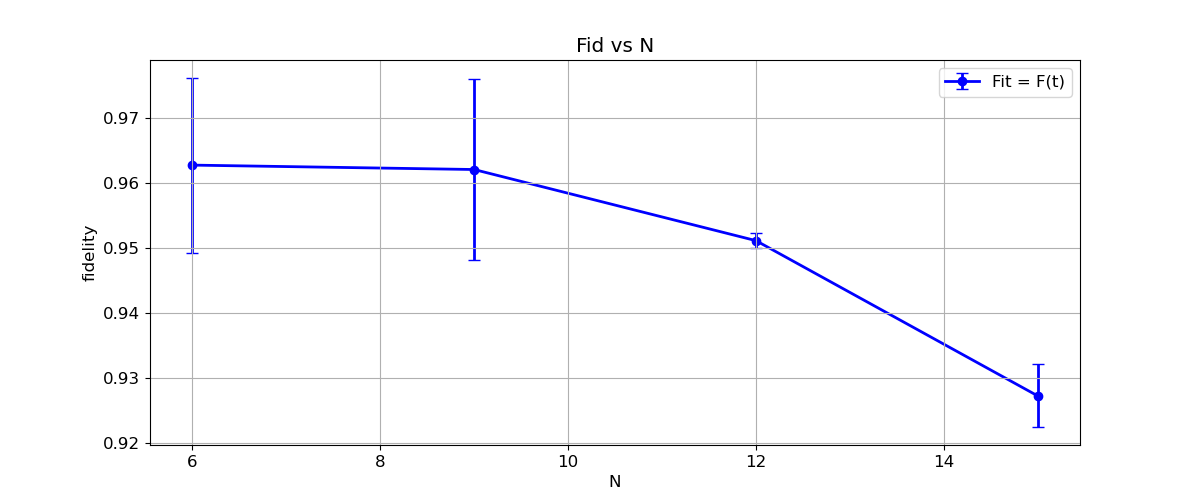

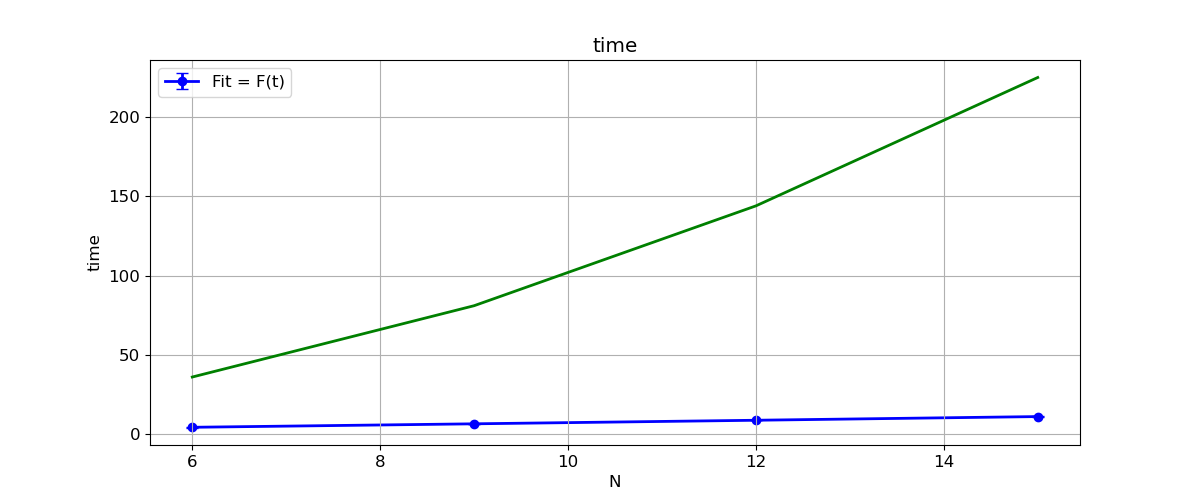

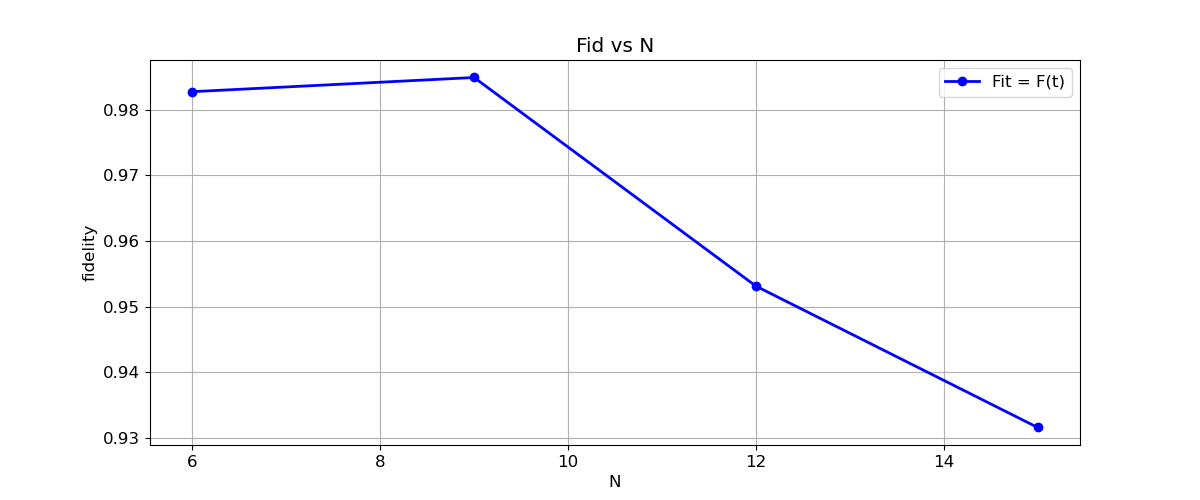

In [18]:

compare_mean([og_fid_data],title= 'Fid vs N', attribute= 'fidelity',labels=['Fit = F(t)','Fit dep del tiempo'])
compare_mean([og_fid_data],title= 'time', attribute= 'time',labels=['Fit = F(t)','Fit dep del tiempo'])

plt.plot(og_fid_data['dimension'],og_fid_data['dimension']*og_fid_data['dimension'])
compare_maxmin([og_fid_data],title= 'Fid vs N', attribute= 'fidelity',labels=['Fit = F(t)','Fit dep del tiempo'])



KeyError: 'Column not found: cpu time'

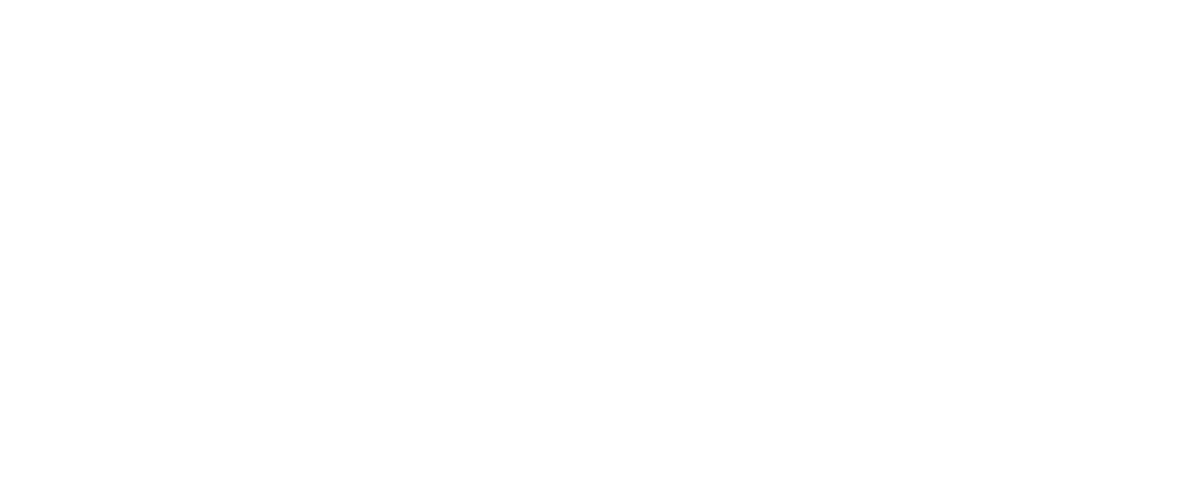

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 2, 'type': 'set_device_pixel_ratio'}


In [19]:

compare_mean([og_fid_data],title= 'Tiempo de transmisión vs N', attribute= 'cpu time',labels=['Fit = F(t)'])
compare_maxmin([og_fid_data],maxmin='min',title= 'Tiempo de transmisión vs N', attribute= 'time',labels=['Fit = F(t)'])

plt.plot(og_fid_data['dimension'],1.5*og_fid_data['dimension'], label = '1.5*N')
plt.legend()

In [ ]:
nh = 30
dt = 0.15
b = 100
acciones = actions(b,nh)
propagadores = gen_props(acciones,nh,b,dt)

Descomposicion espectral: correcta
Propagacion de autoestados: correcta


In [ ]:
test_file = '/home/sofi/Documentos/doc/dynamic_ga/time_dep_fidelity/act_sequence_n30_sample0.dat'
action_sequence = np.genfromtxt(test_file,dtype=int)

state = np.zeros(nh, dtype=np.complex_)
state[0] = 1.

nat_evolution = []
action_sequence = np.zeros(500,dtype= int)

for action in action_sequence:
    
    state = np.matmul(propagadores[action, :, :], state)
    fid = np.real(state[nh-1]*np.conjugate(state[nh-1]))
    nat_evolution = np.append(nat_evolution,fid)
    

    if abs(la.norm(state) - 1.)>1E-8:
        print('FALLO EN LA NORMALIZACION',la.norm(state))


In [ ]:
test_file = '/home/sofi/Documentos/doc/dynamic_ga/time_dep_fidelity/act_sequence_n30_sample0.dat'

action_sequence = np.genfromtxt(test_file,dtype=int)
state = np.zeros(nh, dtype=np.complex_)
state[0] = 1.
fid_evolution = []
ev_real_n = [np.real(state[nh-1])**2]
ev_imag_n = [np.imag(state[nh-1])**2]
ev_real_0 = [np.real(state[0])**2]
ev_imag_0 = [np.imag(state[0])**2]
ev_norm = [la.norm(state)]

for action in action_sequence:
    state = np.matmul(propagadores[action, :, :], state)
    # fid = np.real(state[nh-1])**2+np.imag(state[nh-1])**2
    fid = np.real(state[nh-1]*np.conjugate(state[nh-1]))
    fid_evolution = np.append(fid_evolution, fid)

    ev_real_n = np.append(ev_real_n, np.real(state[nh-1])**2)
    ev_imag_n = np.append(ev_imag_n, np.imag(state[nh-1])**2)
    ev_real_0 = np.append(ev_real_0, np.real(state[0])**2)
    ev_imag_0 = np.append(ev_imag_0, np.imag(state[0])**2)
    ev_norm = np.append(ev_norm, la.norm(state))

    if abs(la.norm(state) - 1.) > 1E-8:
        print('FALLO EN LA NORMALIZACION', la.norm(state))

    # else:
        # print('NORMALIZACION OK: ',la.norm(state))

tsteps = np.shape(action_sequence)[0] + 1


In [ ]:
test_file_2 = '/home/sofi/Documentos/doc/dynamic_ga/no_time_fidelity/act_sequence_n30_sample0.dat'

action_sequence = np.genfromtxt(test_file_2,dtype=int)
state = np.zeros(nh, dtype=np.complex_)
state[0] = 1.
fid_evolution_2 = []

ev_real_n = [np.real(state[nh-1])**2]
ev_imag_n = [np.imag(state[nh-1])**2]
ev_real_0 = [np.real(state[0])**2]
ev_imag_0 = [np.imag(state[0])**2]
ev_norm = [la.norm(state)]

for action in action_sequence:
    state = np.matmul(propagadores[action, :, :], state)
    # fid = np.real(state[nh-1])**2+np.imag(state[nh-1])**2
    fid = np.real(state[nh-1]*np.conjugate(state[nh-1]))
    fid_evolution_2 = np.append(fid_evolution_2, fid)

    ev_real_n = np.append(ev_real_n, np.real(state[nh-1])**2)
    ev_imag_n = np.append(ev_imag_n, np.imag(state[nh-1])**2)
    ev_real_0 = np.append(ev_real_0, np.real(state[0])**2)
    ev_imag_0 = np.append(ev_imag_0, np.imag(state[0])**2)
    ev_norm = np.append(ev_norm, la.norm(state))

    if abs(la.norm(state) - 1.) > 1E-8:
        print('FALLO EN LA NORMALIZACION', la.norm(state))

    # else:
        # print('NORMALIZACION OK: ',la.norm(state))

tsteps = np.shape(action_sequence)[0] + 1


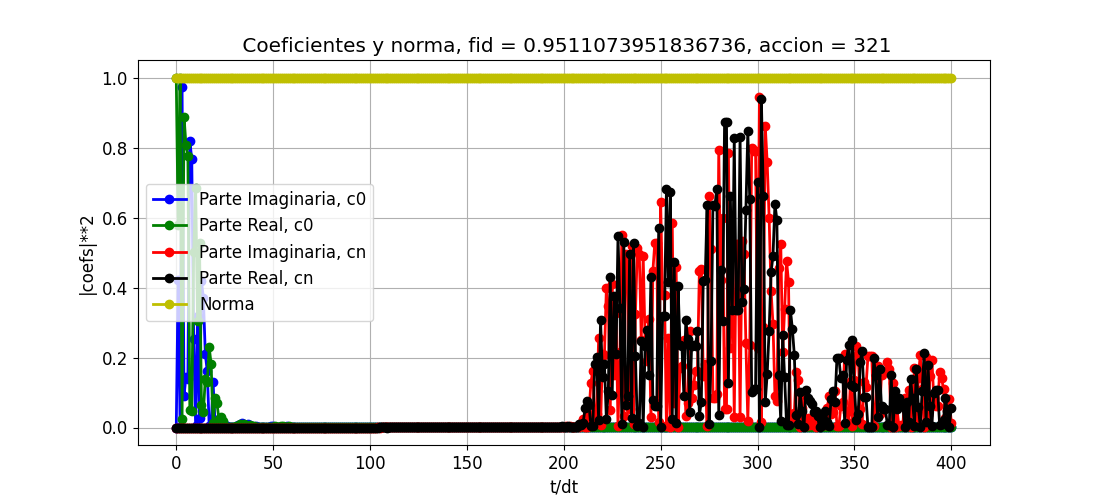

In [ ]:
axs = plt.figure(figsize=(11,5))
max_fid = np.max(fid_evolution)
max_action = np.argmax(fid_evolution)

plt.plot(np.arange(0,tsteps,1),ev_imag_0, '-o', label = 'Parte Imaginaria, c0')
plt.plot(np.arange(0,tsteps,1),ev_real_0, '-o', label = 'Parte Real, c0')
plt.plot(np.arange(0,tsteps,1),ev_imag_n, '-o', label = 'Parte Imaginaria, cn')
plt.plot(np.arange(0,tsteps,1),ev_real_n, '-o', label = 'Parte Real, cn')
plt.plot(np.arange(0,tsteps,1),ev_norm, '-o', label = 'Norma')
plt.grid()
plt.title(' Coeficientes y norma, fid = {}, accion = {}'.format(max_fid,max_action))
plt.xlabel('t/dt')
plt.ylabel('|coefs|**2')
plt.legend()

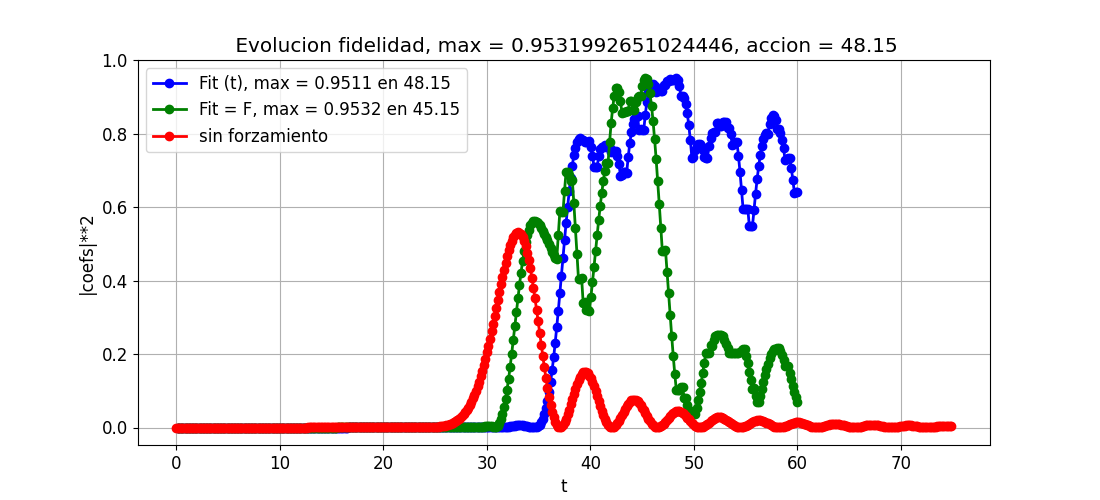

In [ ]:
axs = plt.figure(figsize=(11,5))
max_fid = np.max(fid_evolution)
max_fid_2 = np.max(fid_evolution_2)

max_action = np.argmax(fid_evolution)*0.15
max_action_2 = np.argmax(fid_evolution_2)*0.15

plt.plot(np.arange(1,tsteps,1)*0.15,fid_evolution, '-o', label = 'Fit (t), max = {:.4f} en {} '.format(max_fid,max_action))
plt.plot(np.arange(1,tsteps,1)*0.15,fid_evolution_2, '-o', label = 'Fit = F, max = {:.4f} en {}'.format(max_fid_2,max_action_2))
plt.plot(np.arange(0,500,1)*0.15,nat_evolution, '-o', label = 'sin forzamiento')

plt.grid()
plt.title(' Evolucion fidelidad, max = {}, accion = {}'.format(np.max([max_fid,max_fid_2]),max_action))
plt.xlabel('t')
plt.ylabel('|coefs|**2')
plt.legend()